## Preliminary Wrangling
This document explores a dataset containing records for approximately 175,000 bike trips. In this project, the dataset is explored, visualised and noted down the key insights for it.

#### by Adel Samir ElZemity

In [54]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [55]:
df = pd.read_csv('tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [56]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [57]:
#checking number of cells with NaN values
sum(df.isnull().values.ravel())

17318

In [58]:
# filling up the missing values in member_birth_year with mean of Ages
df['member_birth_year'].fillna((df['member_birth_year'].mean()), inplace=True)

# filling up the missing values in member_gender with mode of Genders
df['member_gender'].fillna((df['member_gender'].mode()), inplace=True)

#checking number of cells with NaN values again
sum(df.isnull().values.ravel())

9053

In [59]:
#droping rows with NaN values as they are empty rows at the end of the sheet
df.dropna(inplace=True)

#checking number of cells with NaN values again
sum(df.isnull().values.ravel())

0

In [60]:
# descriptive statistics for numeric variables
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  174952.000000     174952.000000           174952.000000   
mean      704.002744        139.002126               37.771220   
std      1642.204905        111.648819                0.100391   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       510.000000        104.000000               37.780760   
75%       789.000000        239.000000               37.797320   
max     84548.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174952.000000   174952.000000         174952.000000   
mean               -122.351760      136.604486             37.771414   
std                   0.117732      111.335635              0.100295   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      238.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          174952.000000  174952.000000      174952.000000  
mean             -122.351335    4482.587555        1984.803135  
std                 0.117294    1659.195937          10.118731  
min              -122.453704      11.000000        1878.000000  
25%              -122.411647    3799.000000        1980.000000  
50%              -122.397437    4960.000000        1987.000000  
75%              -122.286533    5505.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

### What is the structure of the dataset?
There are 174952 bike trip records with 10 features (Duration, Start Time, End Time ,Start Location, End Location, Age, User Type, Gender, Bike Share Statues) 

Most variable are numeric but the variables Gender, User Type, and Bike Share Statues are qualitative

Gender: Male, Female, Other

User Type: Customer, Subscriber

Bike Share Statues: Yes, No

### What is the main feature of interest in the dataset?
I am interested to see how all the features affect and predict the duration of the trip

### What features in the dataset do you think will help support your investigation into your feature of interest?
I think the Starting Location, End Location, Gender, Type of User, Age will strongly corelate with the duration of the trip.



## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: Duration.

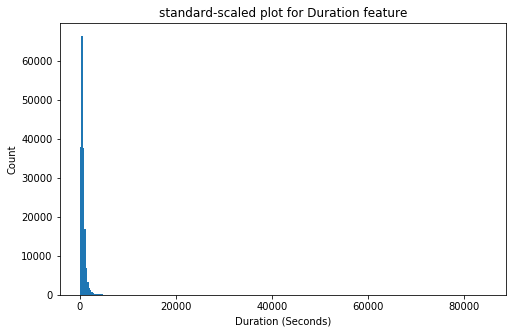

In [61]:
# start with a standard-scaled plot
binsize = 300
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
plt.title('standard-scaled plot for Duration feature')
plt.show()

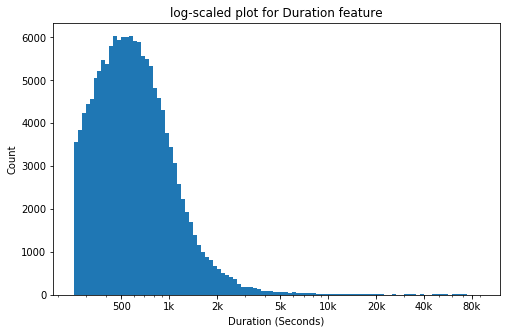

In [62]:
# there's a long tail in the distribution and huge outliers, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
plt.title('log-scaled plot for Duration feature')
plt.show()

Duration has a long tailed distribution and huge outliers. When plotted on a log scale, the diagram is positively (right) skewed, and has a starting value of 61 seconds, it has a peak around the 700 seconds. There is an expected fall for the values as the duration increases.

Next up, the first predictor variable of interest: Age.

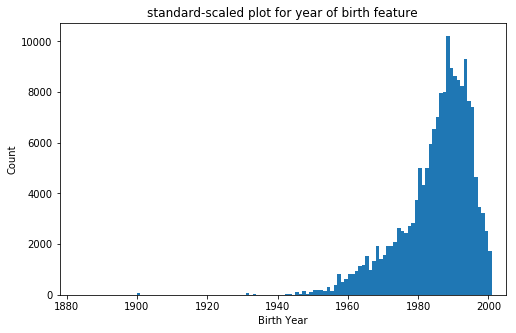

In [63]:
# plotting age on a standard scale
binsize = 1
bins = np.arange(0, df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlim([1878,2005])
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.title('standard-scaled plot for year of birth feature')
plt.show()

The age graph is left skewed scoring the most between 1980 and 2000 years old. This may indicate that the younger the person is the more duration the trip becomes. But we will see in the following graphs if this assumption is correct or not.

Now exploring the qualitiative features: Gender, User Type, Bike Sharing Status

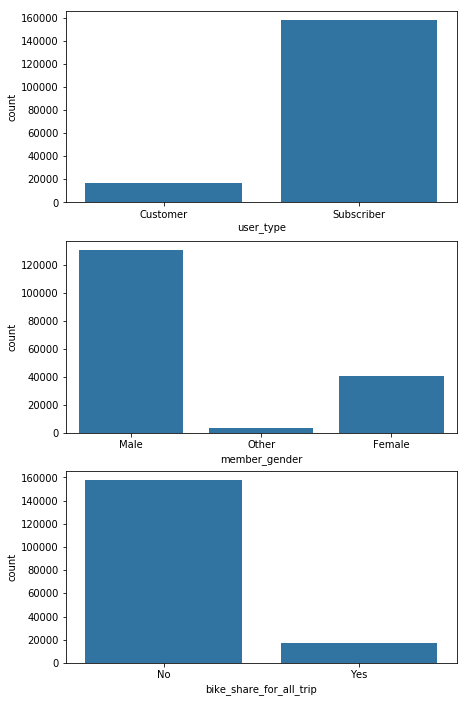

In [64]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [7,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

plt.show()

The data shows that most of the users tend to be subscribers and also the majority are males. But for the bike sharing, most are not doing this.

Now, let's explore the other features to see if any holds any interest to us

Text(0.5, 1.0, 'Scatter plot for latitude & longitude for start station')

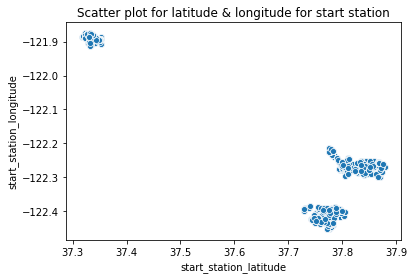

In [65]:
# plotting x and y coordinates for the start as a scatter plot
sb.scatterplot(data=df, x="start_station_latitude", y="start_station_longitude").set_title('Scatter plot for latitude & longitude for start station')

Text(0.5, 1.0, 'Scatter plot for latitude & longitude for end station')

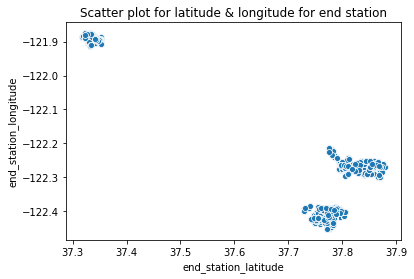

In [66]:
# plotting x and y coordinates for the ending station as a scatter plot
sb.scatterplot(data=df, x="end_station_latitude", y="end_station_longitude").set_title('Scatter plot for latitude & longitude for end station')

These two graphs for the coordinates of the start and end suggest that there are two clusters of stations that is much near to each other than the one cluster far above on the left. Trips to and from the close clusters will result in less duration time. So, it would make more sense to exclude the cluster of stations that is far away to be able to accurately co-relate all other variables to the duration of the trip.

In [67]:
# select outliers, using criteria eyeballed from the plots

start_outliers = ((df['start_station_latitude'] < 37.6) | (df['start_station_longitude'] > -122))
end_outliers = ((df['end_station_latitude'] < 37.6) | (df['end_station_longitude'] > -122))

# calculating upper bound for duration to opt outliers out: Q3 + 1.5×IQR
# there are no outliers lower than the lower bound as it's in the negatives
duration_outliers = ((df['duration_sec'] > 1488))


print(start_outliers.sum())
print(end_outliers.sum())
print(duration_outliers.sum())

7961
7962
9328


Text(0.5, 1.0, 'Scatter plot for latitude & longitude for start station')

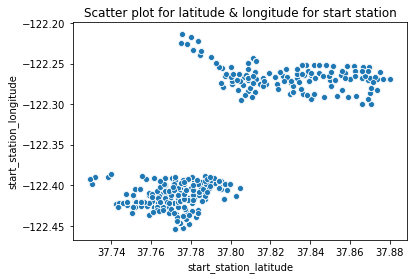

In [68]:
# remove rows with outliers
df = df.loc[-start_outliers & -duration_outliers & -end_outliers,:]

# plotting x and y coordinates for the start as a scatter plot again to check
sb.scatterplot(data=df, x="start_station_latitude", y="start_station_longitude").set_title('Scatter plot for latitude & longitude for start station')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration variable took a long range of values, so when looked at with a log scale, it seems to be right skewed and has a peak between 500 to 1000 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
when investegating the location of the station, a cluster of stations seemed to be far away from the other clusters, that would majorly affect the data. Thus, for safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

In [69]:
numeric_vars = ['duration_sec', 'bike_id', 'member_birth_year', 'end_station_id', 'start_station_id']
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']

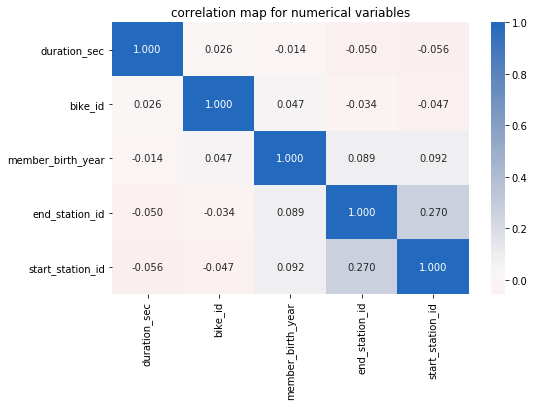

In [70]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('correlation map for numerical variables')
plt.show()

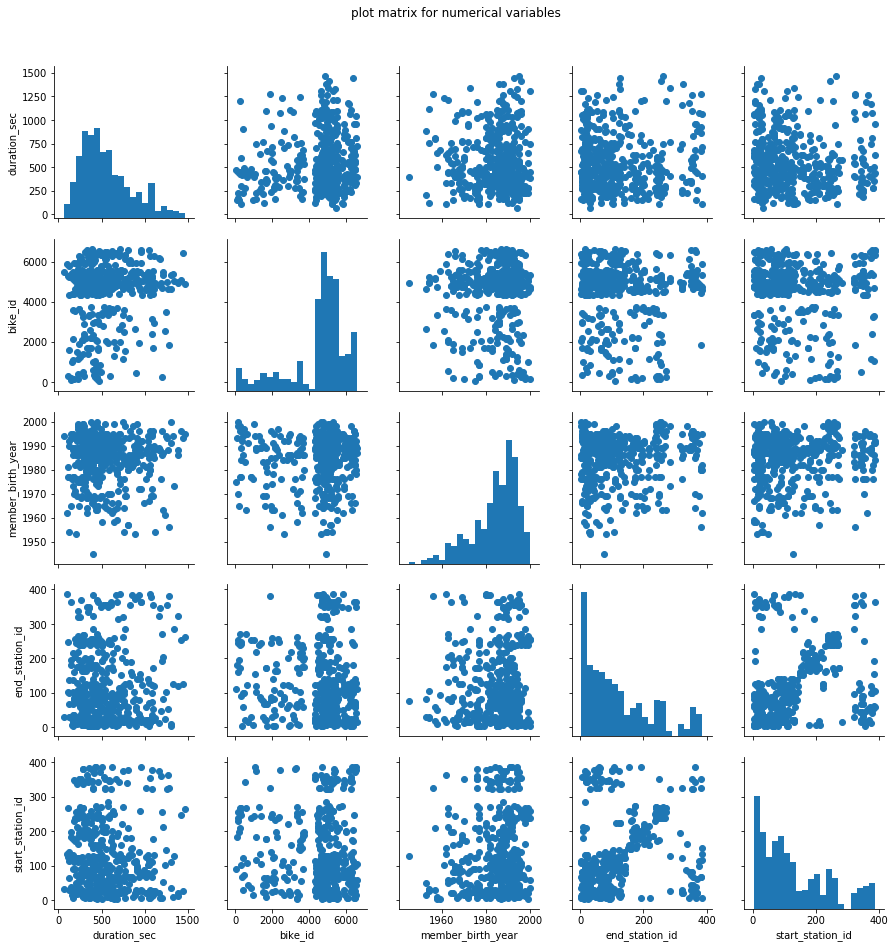

In [71]:
# plot matrix: sample 5000 trips so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
trips_samp = df.loc[samples,:]

g = sb.PairGrid(data = trips_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.suptitle('plot matrix for numerical variables').set_position([.5, 1.05])



Surprisingly, there are no strong correlations in the dataset between the quantitiative variables. I won't perform further analysis with these variables as they seem of less interest to get insights.

Now, let's move to the categorical data and how they relate to the price

C:\Users\Adel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

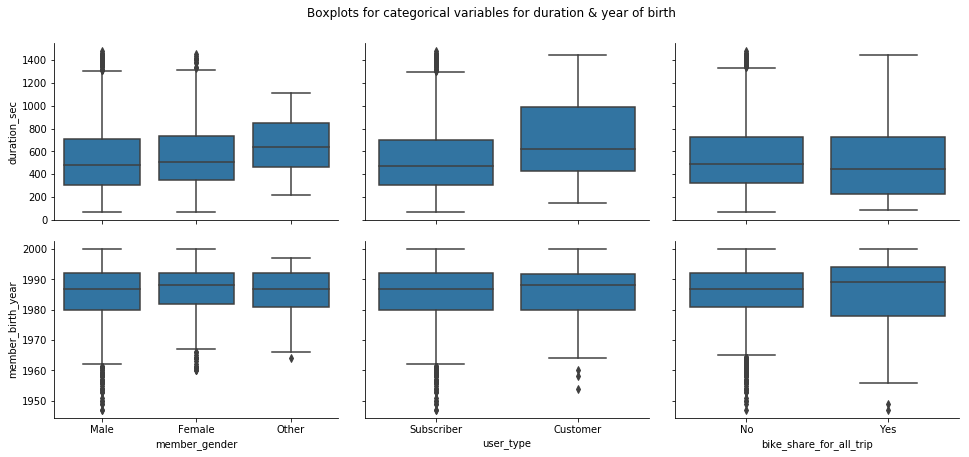

In [72]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['duration_sec', 'member_birth_year'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)

plt.suptitle('Boxplots for categorical variables for duration & year of birth').set_position([.5, 1.05])

plt.show();


There is an interesting relationship betwwen User type and the duration, it appears that being a subscriber doesn't imply spending more time. Same with bike sharing status, it's inversely related to the duration of the trip. Females spend more time more than males and other genders. These will be further investigated in the following.

Let's take a look on the relationships betwwen the the categorical data:

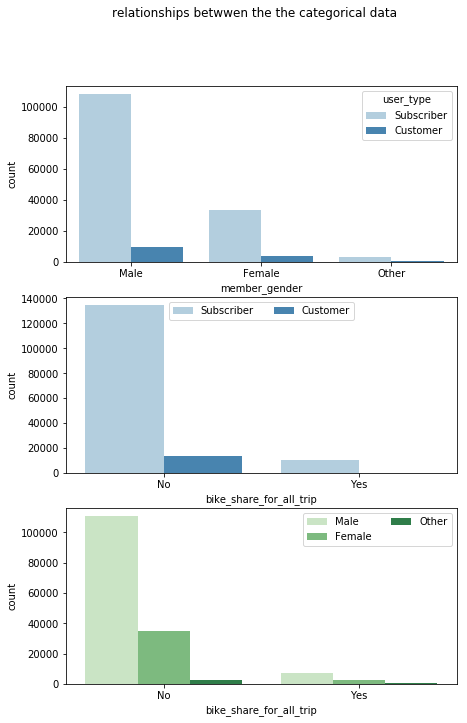

In [73]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [7, 11])

# subplot 1: Member gender vs User Type
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: Bike Sharing Status vs. User Type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: Bike Sharing Status vs. Member Gender, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.suptitle('relationships betwwen the the categorical data')
plt.show()

There are interesting findings that:
- Majority of males tend to subscribe
- Customers are not at all sharing the bikes
- Majority of users tend not to use the sharing option whatever the gender

Now let's take a look on the replationship between duration and categorical data in more details

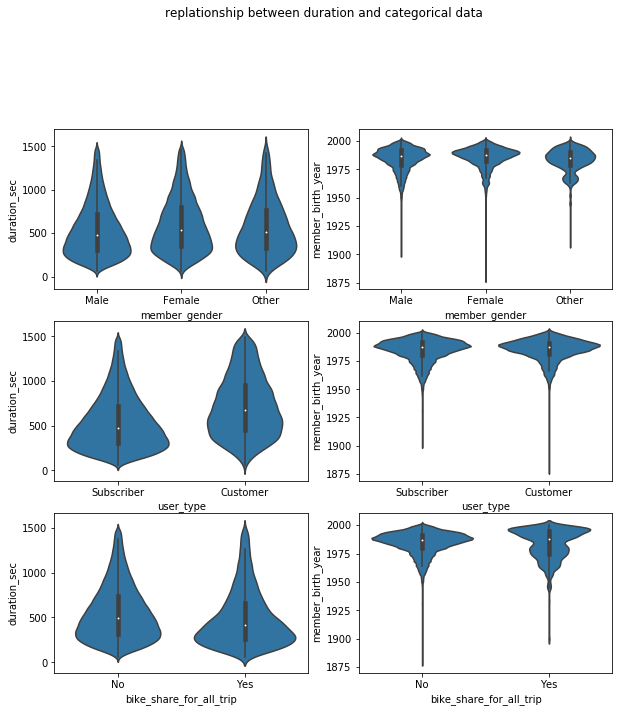

In [74]:
# plot the categorical variables against duration and birth year again, this time with full data 
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x = var, y = 'duration_sec', ax = ax[i,0],
               color = default_color)
    
    sb.violinplot(data = df, x = var, y = 'member_birth_year', ax = ax[i,1],
               color = default_color)
    
plt.suptitle('replationship between duration and categorical data').set_position([.5, 1.05])

plt.show()

As seen earlier in the box plots, it's more clear now that even though the customer appeared to spend more time in the trip which was not expected. Now, in the viloin plot, the number of subscribers is much higher than the customers, thus lowering the average time spent. It would be interesting to see the categorical variables in the multivariable plot.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Surprisingly, the quantitiative variables were not much of a benefit as they did not show any high correlation to the duration of the trip. Thus, no need for further investigation. 

However, there are intersting observations when it came to categorical variables, thus the need for further investigation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, there are no interesting relationships between other features as seen in the previous spreadout of bivariate exploration.

### Multivariate Exploration
The main thing I want to explore in this part of the analysis is how the three categorical variables change the relationship between duration and year of birth.

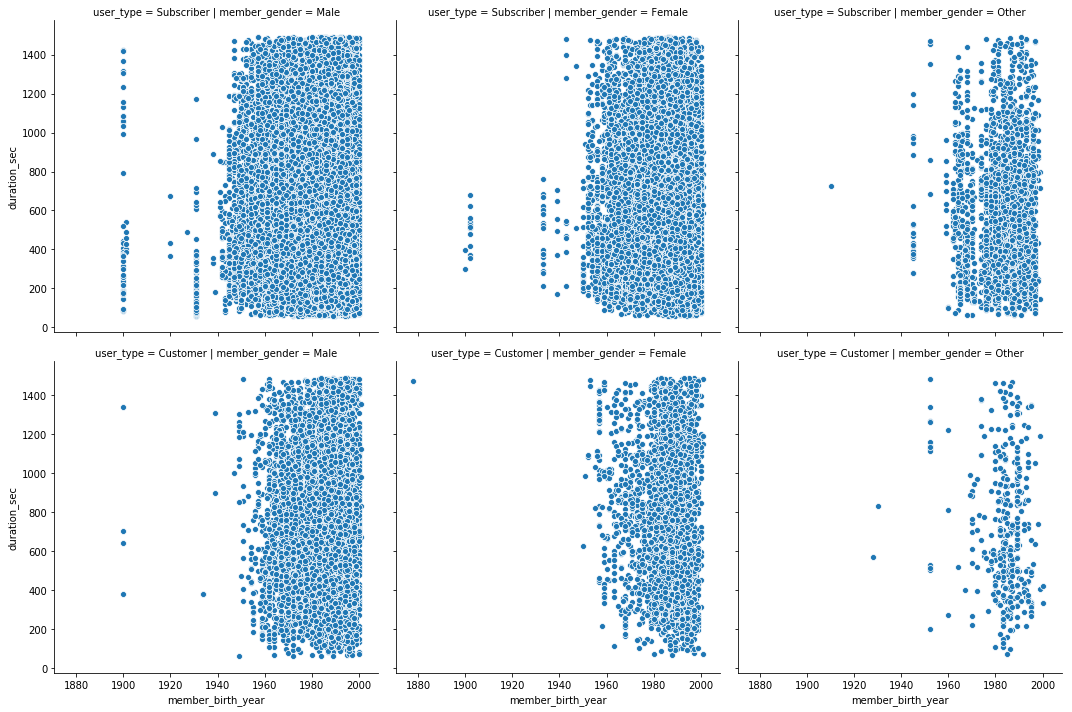

In [75]:
# plotting Birth Year Vs Duration while considering (User Type and Gender)
g = sb.FacetGrid(df, col="member_gender",  row="user_type", height = 5)
g.map(sb.scatterplot, "member_birth_year", "duration_sec")

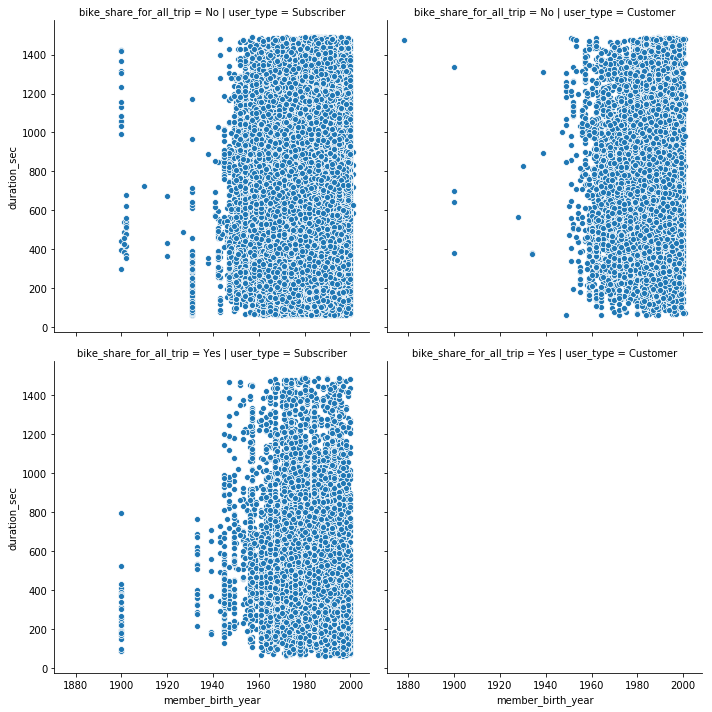

In [76]:
# plotting Birth Year Vs Duration while considering (bike sharing status and user type)
g = sb.FacetGrid(df, col="user_type",  row="bike_share_for_all_trip", height = 5)
g.map(sb.scatterplot, "member_birth_year", "duration_sec")

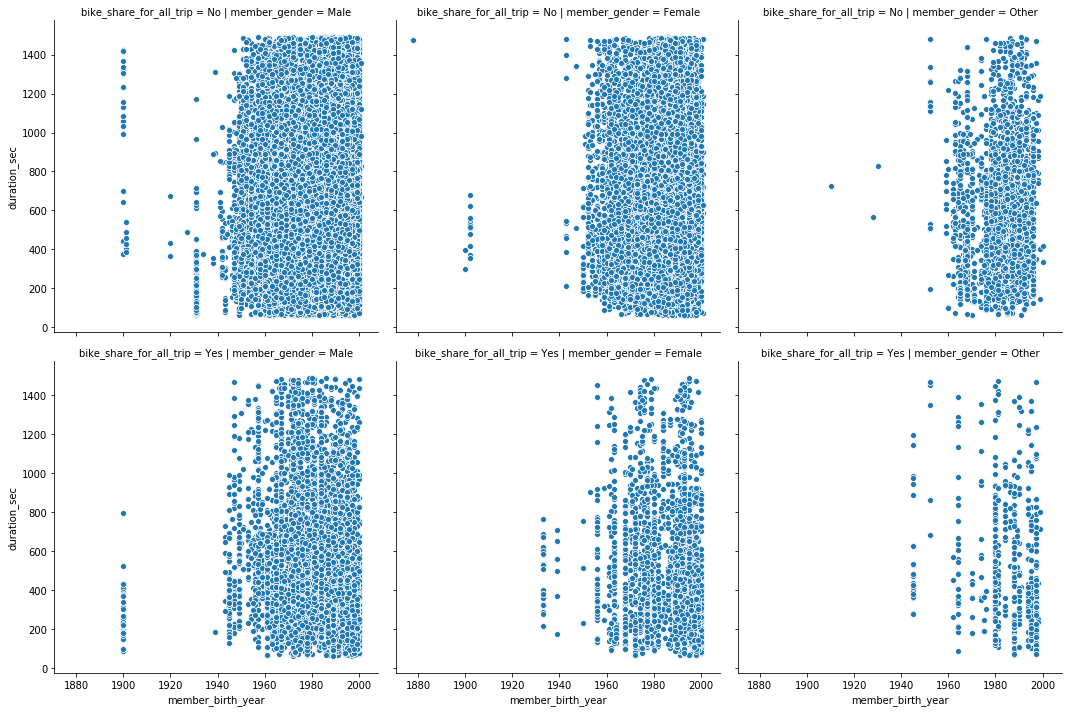

In [77]:
# plotting Birth Year Vs Duration while considering (bike sharing status and Gender)
g = sb.FacetGrid(df, col="member_gender",  row="bike_share_for_all_trip", height = 5)
g.map(sb.scatterplot, "member_birth_year", "duration_sec")

As expected, factoring in the categorical variabels did not change or give inshights about the relationship between the duration and year of birth. Thus, leading to no benefecial insights out of this multivariable expolration